<a href="https://colab.research.google.com/github/samiya-jabbar/my_deep_learning_assignments_AI_course_PIAIC/blob/main/Credit_Card_Fraud_Detection_PIAIC88719.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('./drive/MyDrive/creditcard.csv')
data

In [ ]:
data.isnull().any()

In [ ]:
data.reset_index(drop=True, inplace=True)
labels = data.pop('Class')
labels

In [ ]:
data -= data.mean()
data /= data.std()

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-2.813364e-16,-1.438401e-17,1.155812e-16,-5.760700e-18,-1.655322e-16,-5.218357e-17,-1.522134e-16,-1.228474e-16,-2.308196e-16,-9.001454e-17,6.203141e-17,-2.041949e-16,1.767651e-16,-9.952312e-17,-1.634366e-16,1.847103e-16,-2.396510e-17,-2.067467e-17,4.754877e-18,-1.148333e-16,-1.487148e-17,1.608556e-17,-6.880017e-17,-1.035031e-16,-3.221053e-17,1.273494e-16,-1.252073e-16,1.158865e-17,-5.836597e-17,3.251621e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.996580e+00,-2.879850e+01,-4.403521e+01,-3.187168e+01,-4.013912e+00,-8.240795e+01,-1.963602e+01,-3.520933e+01,-6.130242e+01,-1.222799e+01,-2.258187e+01,-4.700120e+00,-1.869865e+01,-5.819382e+00,-2.004425e+01,-4.915182e+00,-1.612532e+01,-2.962640e+01,-1.133264e+01,-8.861386e+00,-7.069134e+01,-4.741898e+01,-1.506562e+01,-7.175434e+01,-4.683630e+00,-1.975030e+01,-5.401088e+00,-5.590650e+01,-4.674604e+01,-3.532288e-01
25%,-8.552105e-01,-4.698909e-01,-3.624701e-01,-5.872131e-01,-5.993777e-01,-5.010677e-01,-5.766811e-01,-4.478852e-01,-1.746801e-01,-5.853621e-01,-4.917352e-01,-7.470211e-01,-4.058956e-01,-6.516187e-01,-4.439557e-01,-6.368121e-01,-5.341344e-01,-5.695599e-01,-5.951610e-01,-5.605359e-01,-2.746329e-01,-3.109428e-01,-7.473463e-01,-2.591780e-01,-5.854666e-01,-6.083990e-01,-6.780705e-01,-1.755050e-01,-1.604437e-01,-3.308395e-01
50%,-2.131450e-01,9.245335e-03,3.965677e-02,1.186122e-01,-1.401721e-02,-3.936675e-02,-2.058043e-01,3.241718e-02,1.871979e-02,-4.681161e-02,-8.533536e-02,-3.209262e-02,1.401445e-01,-1.363248e-02,5.278693e-02,5.251907e-02,7.579241e-02,-7.732590e-02,-4.338363e-03,4.588006e-03,-8.104691e-02,-4.009422e-02,9.345360e-03,-1.792417e-02,6.765666e-02,3.183234e-02,-1.081215e-01,3.325168e-03,3.406362e-02,-2.652710e-01
75%,9.372158e-01,6.716927e-01,4.867194e-01,6.774557e-01,5.250073e-01,4.433457e-01,2.991620e-01,4.611099e-01,2.740780e-01,5.435296e-01,4.168834e-01,7.245851e-01,6.187322e-01,6.656507e-01,5.144504e-01,7.088490e-01,5.971978e-01,4.705729e-01,5.974958e-01,5.637918e-01,1.725730e-01,2.537387e-01,7.283347e-01,2.364315e-01,7.257141e-01,6.727994e-01,4.996654e-01,2.255644e-01,2.371521e-01,-4.471699e-02
max,1.642055e+00,1.253349e+00,1.335773e+01,6.187982e+00,1.191872e+01,2.521409e+01,5.502005e+01,9.747807e+01,1.675150e+01,1.419492e+01,2.180754e+01,1.177502e+01,7.854665e+00,7.160723e+00,1.098145e+01,9.699100e+00,1.976040e+01,1.089500e+01,6.014331e+00,6.869402e+00,5.113455e+01,3.703465e+01,1.447302e+01,3.607661e+01,7.569671e+00,1.442529e+01,7.293962e+00,7.831926e+01,1.025432e+02,1.023621e+02


In [ ]:
data_len = len(data)
train_data = data.iloc[:data_len*50//100]
val_data = data.iloc[data_len*50//100:data_len*70//100]
test_data = data.iloc[data_len*70//100:]
labels_len = len(labels)
train_labels = labels.iloc[:labels_len*50//100]
val_labels = labels.iloc[labels_len*50//100:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

In [ ]:
data_len

284807

In [ ]:
train_data

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network = models.Sequential()
network.add(layers.Dense(10,activation="tanh",input_shape=(len(train_data.columns),) ))
network.add(layers.Dense(8,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(6,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
MODEL = network.fit(train_data,train_labels,epochs=10,batch_size=256,validation_data=(val_data,val_labels))

Epoch 1/10
557/557 [==============================] - 2s 2ms/step - loss: 0.2140 - acc: 0.9335 - val_loss: 1.3306 - val_acc: 0.5561
Epoch 2/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0052 - acc: 0.9992 - val_loss: 1.5319 - val_acc: 0.6023
Epoch 3/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0042 - acc: 0.9992 - val_loss: 1.5755 - val_acc: 0.6145
Epoch 4/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0035 - acc: 0.9993 - val_loss: 1.4900 - val_acc: 0.6464
Epoch 5/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0028 - acc: 0.9994 - val_loss: 1.2485 - val_acc: 0.6875
Epoch 6/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0036 - acc: 0.9993 - val_loss: 1.1451 - val_acc: 0.7122
Epoch 7/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0031 - acc: 0.9995 - val_loss: 1.0209 - val_acc: 0.7389
Epoch 8/10
557/557 [==============================] - 1s 2ms/step - loss: 0.

In [36]:
test_loss , test_acc = network.evaluate(test_data,test_labels)

2671/2671 [==============================] - 3s 980us/step - loss: 1.6110 - acc: 0.6003


In [37]:
test_labels[test_labels == 1]

199896    1
201098    1
201601    1
203324    1
203328    1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 108, dtype: int64

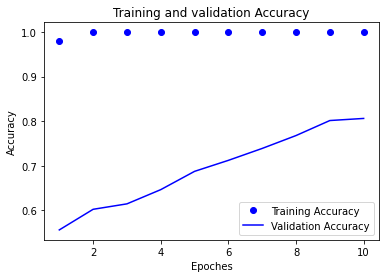

In [38]:
history_dict = MODEL.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
# plt.show()

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network1 = models.Sequential()
network1.add(layers.Dense(10,activation="relu",input_shape=(len(train_data.columns),) ))
network1.add(layers.Dense(8,activation="relu",input_shape=(data.shape[1],) ))
network1.add(layers.Dense(6,activation="relu",input_shape=(data.shape[1],) ))
network1.add(layers.Dense(1,activation="sigmoid"))
network1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
MODEL1 = network1.fit(train_data,train_labels,epochs=10,batch_size=512,validation_data=(val_data,val_labels))

Epoch 1/10
279/279 [==============================] - 1s 3ms/step - loss: 0.2970 - acc: 0.9901 - val_loss: 0.0220 - val_acc: 0.9980
Epoch 2/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0068 - acc: 0.9981 - val_loss: 0.0226 - val_acc: 0.9990
Epoch 3/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 0.9991 - val_loss: 0.0247 - val_acc: 0.9980
Epoch 4/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0256 - val_acc: 0.9974
Epoch 5/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0324 - val_acc: 0.9954
Epoch 6/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.0250 - val_acc: 0.9971
Epoch 7/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0032 - acc: 0.9993 - val_loss: 0.0223 - val_acc: 0.9967
Epoch 8/10
279/279 [==============================] - 1s 2ms/step - loss: 0.

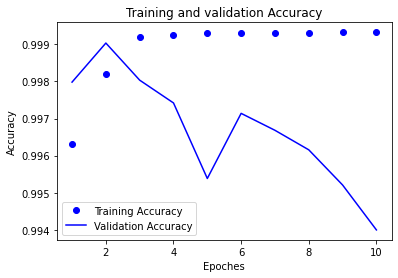

In [41]:
history_dict = MODEL1.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
test_loss , test_acc = network1.evaluate(test_data,test_labels)

2671/2671 [==============================] - 3s 997us/step - loss: 0.0474 - acc: 0.9890


In [45]:
prediction_test_data = test_data
predictions = network1.predict(prediction_test_data)
hit = np.argmax(predictions) == np.array(test_labels)
print(f"Accuracy = {test_acc*100}%")

Accuracy = 98.9021897315979%
